In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Data displays sales(in thousands of units) for a particular product as a function of advertising budgets (in thousand of rupees) for TV, Radio and Newspaper

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


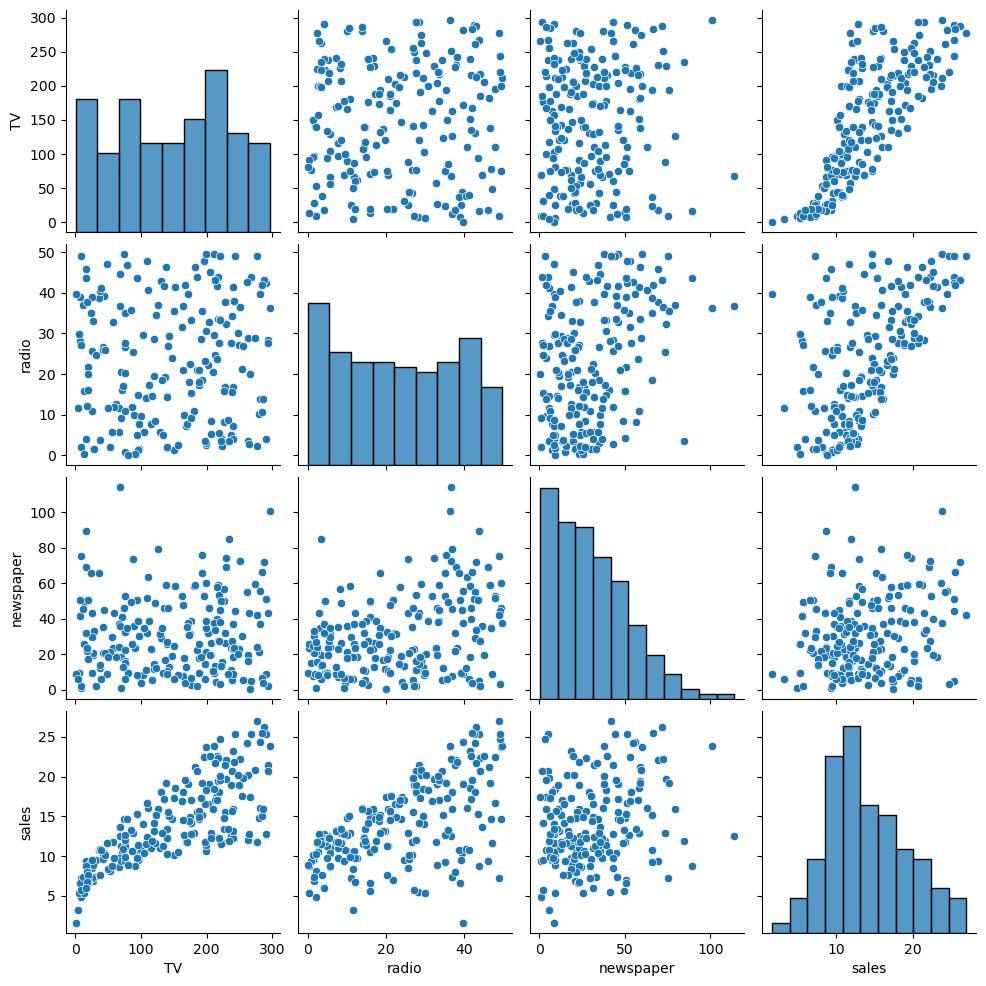

In [4]:
#pair plot
sns.pairplot(df)

In [5]:
X = df.drop('sales',axis=1)
y = df['sales']

## Train | Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [20]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [21]:
len(X_test)

60

In [22]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [23]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

## Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
#make sure you only fit to the training data
model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

## Performance Metrics


* MAE: easy to understand but its just average error
* MSE: Better than MASE because it accounts for outlier (larger errors) which tends to be useful in real world dataset
* RMSE: Best option available because it is in same unit as your y


-- This are loss functions that we want to minimize

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

1.2137457736144803

<Axes: xlabel='sales', ylabel='Count'>

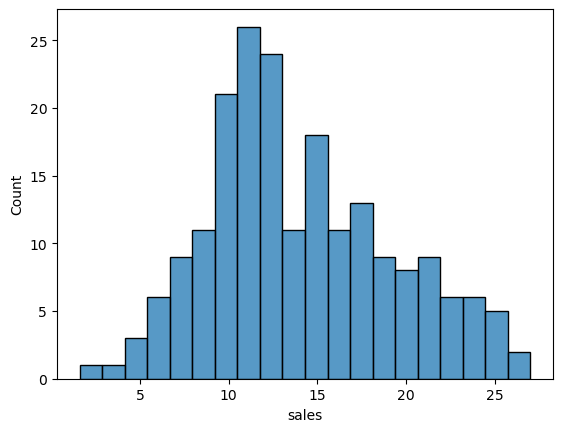

In [34]:
sns.histplot(x='sales',data=df, bins=20)

In [35]:
df['sales'].mean()

14.0225

In [36]:
1.21/14

0.08642857142857142

In [37]:
MSE = mean_squared_error(y_test,y_pred)
MSE

2.2987166978863787

In [38]:
RMSE = np.sqrt(MSE)
RMSE

1.5161519375993882

### Plotting Residuals

In [39]:
test_res = y_test - y_pred

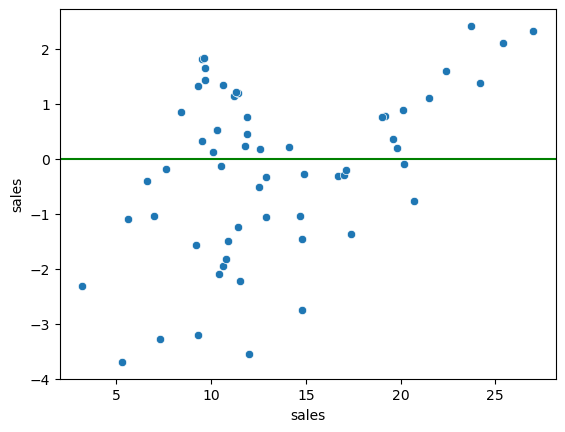

In [42]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,c='g')

## Retrain Model on Full Data

In [43]:
final_model = LinearRegression()

In [44]:
final_model.fit(X,y)

LinearRegression()

### Deployment

In [45]:
y_hat = final_model.predict(X)

Text(0.5, 1.0, 'sales vs newspaper')

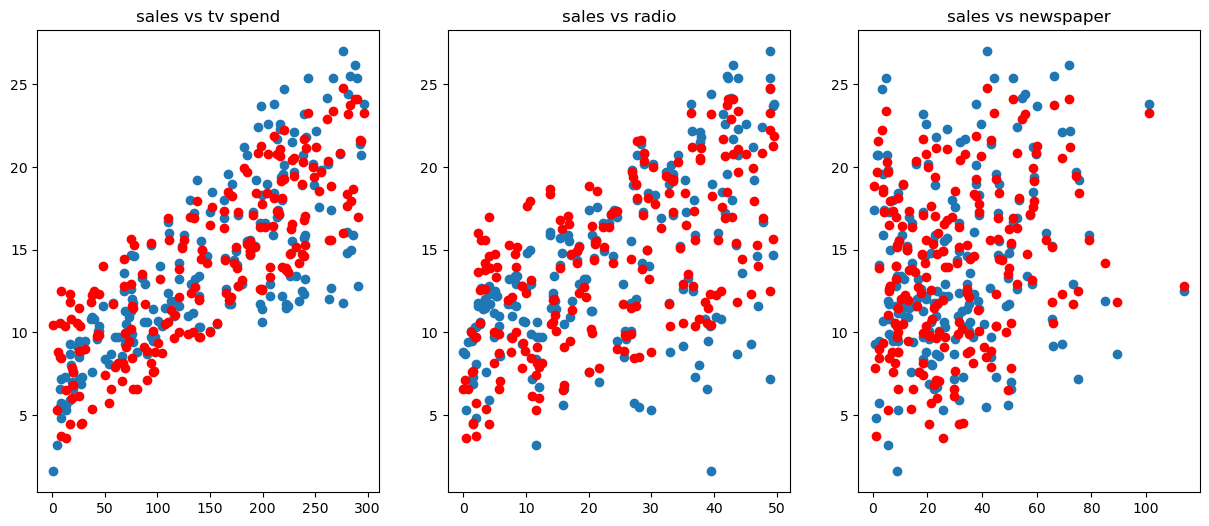

In [50]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(15,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_title('sales vs tv spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title('sales vs radio')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title('sales vs newspaper')


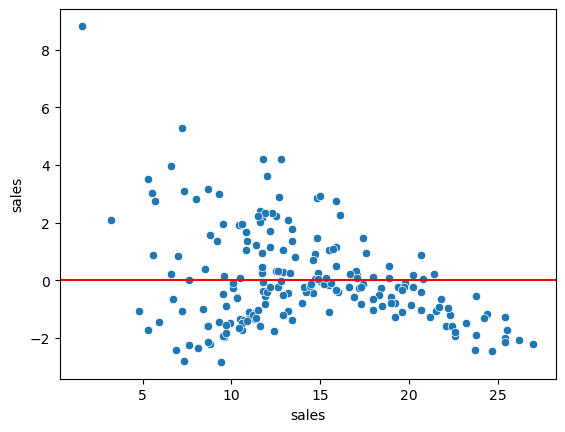

In [54]:
sns.scatterplot(x=y,y=y_hat-y)
plt.axhline(y=0,color='r')

## Coefficients

In [55]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [56]:
year_ads = [[149,22,12],[320,123,900]]
final_model.predict(year_ads)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032  , 39.83902426])

### Save and Predict a Model


In [58]:
from joblib import dump, load

dump(final_model,'sales_model.joblib')

['sales_model.joblib']

In [59]:
loaded_model = load('sales_model.joblib')

In [60]:
loaded_model.predict([[123,43,23],[121,98,342]])

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.65086915, 26.59753051])